In [149]:
# CODE to test if chord diagrams are working as expected
from matplotlib import cm
import pycircos
import pprint

import config as cfg

# pip show pycircos - location of package
# /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pycircos/pycircos.py


In [150]:
def PlotParts(rows,interspace=cfg.INTERSPACE):
    '''  partid, length, color_name = row '''
    # plot circle
    circ = pycircos.Gcircle() 
    for row in rows:
        partid,length,color = row
        # if length>1:
        # Garc(arc_id=None, record=None, size=1000, interspace=3, raxis_range=(500, 550), facecolor=None, edgecolor="#303030", linewidth=0.75, label=None, labelposition=0, labelsize=10, label_visible=False):

        arcc = pycircos.Garc(
                arc_id=partid, 
                size=length, 
                facecolor=color,
                interspace=interspace, 
                raxis_range=(950,1000), 
                labelsize=20,labelposition=60, label_visible=True)
        circ.add_garc(arcc) # adds above to dict of ids
    circ.set_garcs(0,360) # this displays the circle
    return circ  


def PlotNetworks(rows, circ,color_dict ):
    # WARNING!!!! must pass in circ, if store self.circ will NOT DRAW
    ''' REQUIRES: 
                part,
                number of networks, 
                network start col within part
                width of network
                network id = color
    '''
    for row in rows:
        part, start, width, netw = row
        circ.barplot( 
                str(part), # partition is string!
                data = [1], # number to draw (only drawing 1 at a time)
                positions = [start], # col WITHIN PARTITION (NOT CIRCLE COL)
                width = [width],
                facecolor = [ color_dict[netw] ],

                raxis_range=[950,1000], 
            )
    return circ
    
def PlotNetworksColor(rows, circ ):
    ''' see above for defn. This uses passed in colors'''
    # WARNING!!!! must pass in circ, if store self.circ will NOT DRAW
    for row in rows:
        part, start, width, color = row
        circ.barplot( 
                str(part), # partition is string!
                data = [1], # number to draw (only drawing 1 at a time)
                positions = [start], # col WITHIN PARTITION (NOT CIRCLE COL)
                width = [width],
                facecolor = color,
                raxis_range=[950,1000], 
            )
    return circ

def PlotNetworksVERT(part,starts_list, width_list, color_list, circ ):
    " input is list for each "
    # WARNING!!!! must pass in circ, if store self.circ will NOT DRAW
    ''' REQUIRES: 
                part,
                number of networks, 
                network start col within part
                width of network
                network id = color
    '''
    # THIS CREATS ALL NETWORKS AT ONCE FOR EACH PARTITION - instead of one net row at atime
    circ.barplot( 
            str(part), # partition is string!
            data = [1]*len(starts_list), # number to draw (only drawing 1 at a time)
            positions = starts_list, # col WITHIN PARTITION (NOT CIRCLE COL)
            width = width_list,
            facecolor = color_list,
            raxis_range=[950,1000], 
            )
    return circ


In [151]:

part_rows = [ ('A',100, 'blue'),
              ('B',100, 'pink')]

net_rows  = [ ('A',0, 50, 'yellow'), 
              ('B',0, 50, 'orange')]
net_rows_shift =  [  
               ('A',0, 50, 'yellow'), 
               ('A',51, 100, 'purple'), 
               ('B',0, 50, 'orange'),
            ]
net_rows_shift_cor  = [ 
                ('A',0, 50, 'yellow'), 
                ('A',50, 49, 'purple'), 
                ('B',0, 50, 'orange'),
                ('B',50, 49, 'green'),
              ]
net_rows5  = [ ('A',0, 25, 'yellow'), 
               ('A',25, 30, 'purple'), #25+30=55
               ('A',55, 44, 'red'),    # 55+44 = 99
               ('B',0, 50, 'orange'),
               ('B',50, 49, 'green'),
              ]

nodes1 = [
        # id, col, width, ,d,dw,n,  net in rows:
        # test edges
        (('A', 0,1, 1000), ('B',0,1, 1000), 'red'),
        (('A', 0,1, 1000), ('A',24,25, 1000), 'pink'), # A25 - ONE LESS
        (('A', 98,99, 1000), ('B',98,99, 1000), 'green'), # A25 - ONE LESS
        # (('A', 98,1, 1000), ('B',98,1, 1000), 'green'), # A25 - ONE LESS

        # middle
        # (('A', 5,6, 1000), ('B',7,8, 1000), 'pink'),
        # (('A', 5,6, 1000), ('A',5,6, 1000), 'black'), # same start end - not drawn
        ]

def vert(rows,pos):
    return [ row[pos] for row in rows ]

net_parts = vert(net_rows,0)
net_starts = vert(net_rows,1)
net_lens = vert(net_rows,2)
net_colr = vert(net_rows,3)
print(net_parts,net_starts,net_lens,net_colr)

['A', 'B'] [0, 0] [50, 50] ['yellow', 'orange']


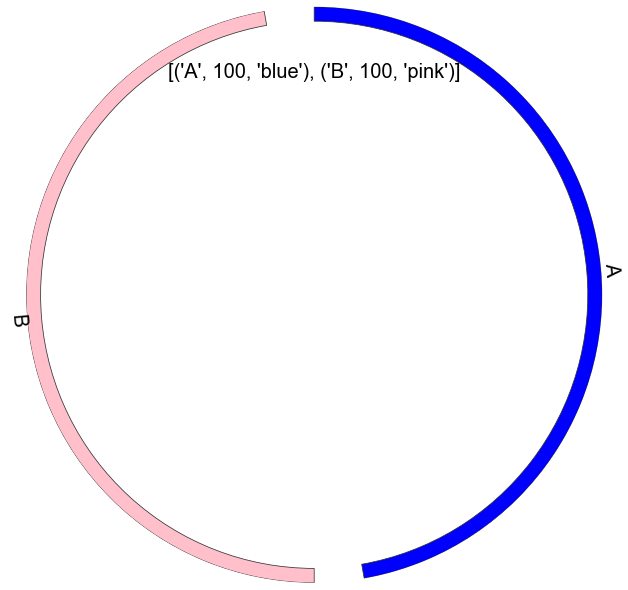

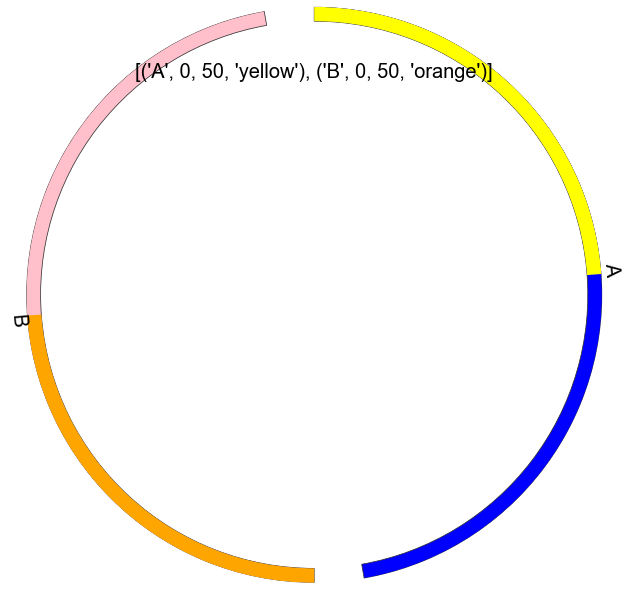

In [152]:
def test1():
    interspace = 10
    c1 = PlotParts(part_rows,interspace)
    c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)

    c2 = PlotParts(part_rows,interspace) 
    PlotNetworksColor(net_rows,c2)
    c2.figure.suptitle("\n\n"+str(net_rows), fontsize=20)
test1()

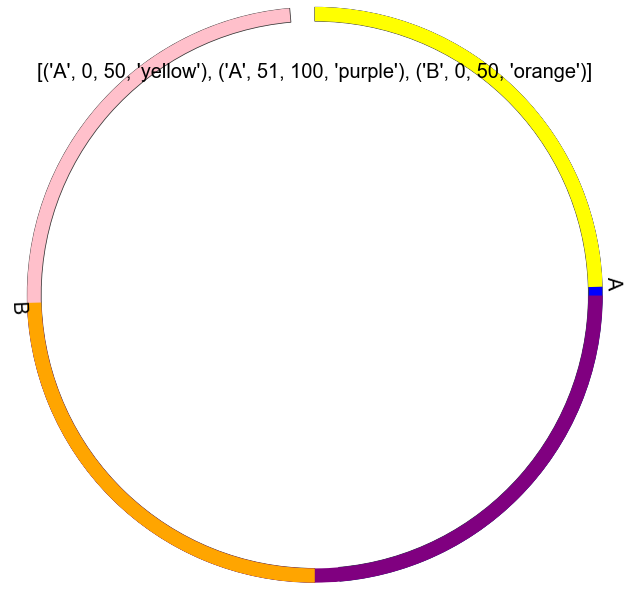

In [153]:
# Plot 2 networks for A - shifted incorrectly
def test2():
    c2 = PlotParts(part_rows) 
    PlotNetworksColor(net_rows_shift,c2)
    c2.figure.suptitle("\n\n"+str(net_rows_shift), fontsize=20)
test2()

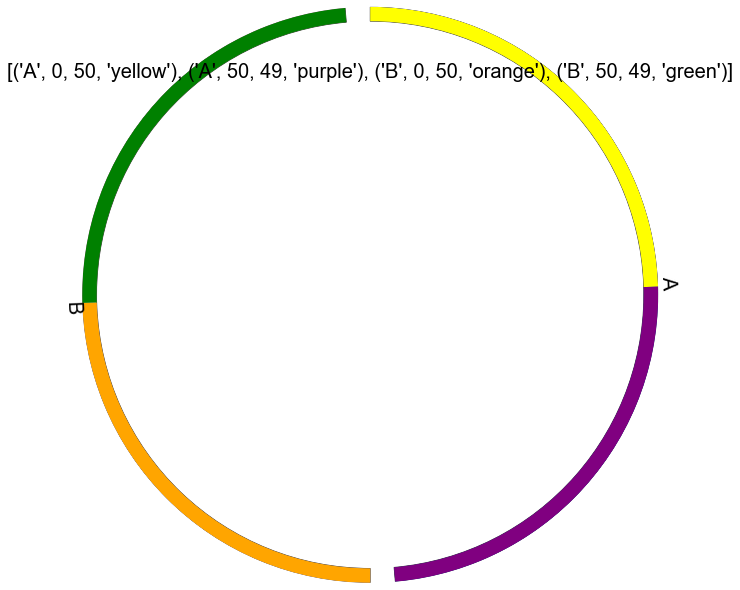

In [154]:
def test4():
    c = PlotParts(part_rows) 
    PlotNetworksColor(net_rows_shift_cor,c)

    c.figure.suptitle("\n\n"+str(net_rows_shift_cor), fontsize=20)
test4()

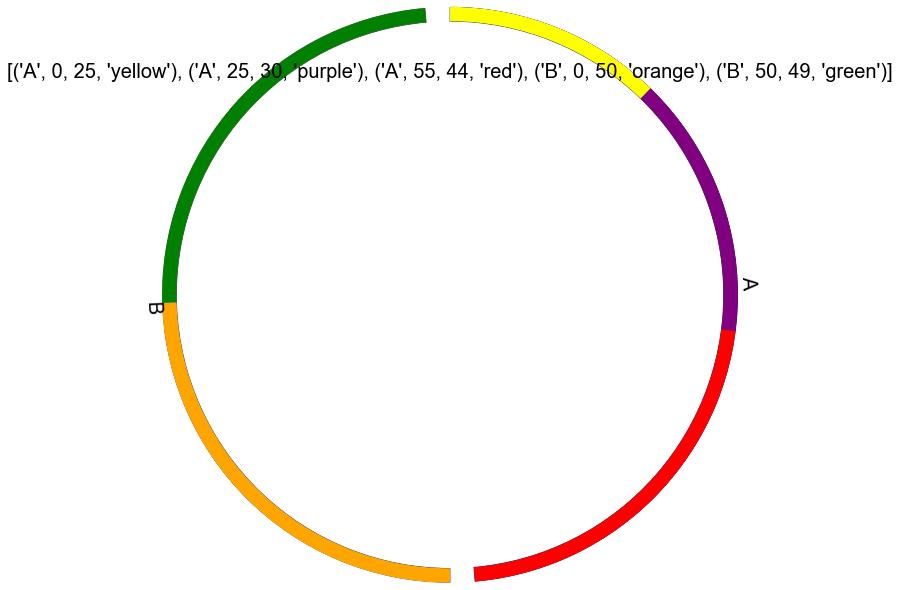

In [155]:
# NETWORK ROWS ARE CALCULATED DIFFRENTEY !!!
# start col is 0 (Not 1)
# next col in row is equal to previous COL+PREV_COL_WIDTH
# width is one less!!! 55+44 = 99
def test5():
    #             col wid
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksColor(net_rows5,c)

    c.figure.suptitle("\n\n"+str(net_rows5), fontsize=20)
test5()

Parts [('A', 100, 'blue'), ('B', 100, 'pink')]
Nets [('A', 0, 25, 'yellow'), ('A', 25, 30, 'purple'), ('A', 55, 44, 'red'), ('B', 0, 50, 'orange'), ('B', 50, 49, 'green')]
Nodes [(('A', 0, 1, 1000), ('B', 0, 1, 1000), 'red'), (('A', 0, 1, 1000), ('A', 24, 25, 1000), 'pink'), (('A', 98, 1, 1000), ('B', 98, 1, 1000), 'green')]


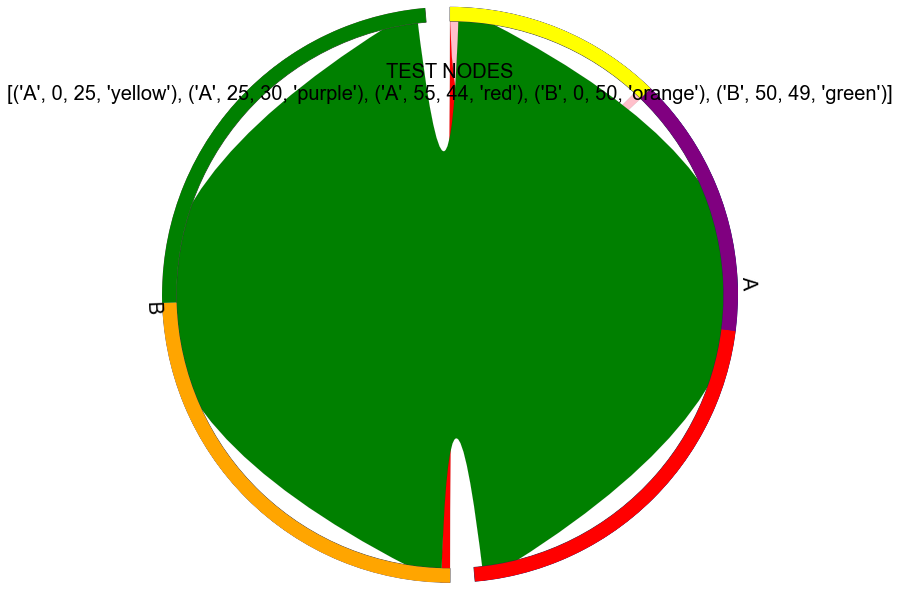

In [156]:
# NETWORK ROWS ARE CALCULATED DIFFRENTEY !!!
# start col is 0 (Not 1)
# next col in row is equal to previous COL+PREV_COL_WIDTH
# width is one less!!! 55+44 = 99

def test_nodes():
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    print("Parts",part_rows)
    print("Nets",net_rows5)
    print("Nodes",nodes1)
    c = PlotParts(part_rows) 
    PlotNetworksColor(net_rows5,c)

    c.figure.suptitle("\n\nTEST NODES\n"+str(net_rows5), fontsize=20)

    # plot one node
    # for p,s,sw,d,dw,n,net in rows:
    for n in nodes1:
        src, dest, color = n
        c.chord_plot(src, dest, facecolor=color,linewidth=0.05)
    # src = ( 'A', 5,6, 1000 )
    # dest = ('B',7,8, 1000)
    # color='black'
    # c.chord_plot(src, dest, facecolor=color)
test_nodes()

Parts [('A', 10000, 'blue'), ('B', 10000, 'pink')]
Nets [('A', 0, 2500, 'yellow'), ('A', 2500, 3000, 'purple'), ('A', 5500, 4400, 'red'), ('B', 0, 5000, 'orange'), ('B', 5000, 4900, 'green')]
Nodes [(('A', 0, 100, 1000), ('B', 0, 100, 1000), 'red'), (('A', 0, 100, 1000), ('A', 2400, 2500, 1000), 'pink'), (('A', 9800, 100, 1000), ('B', 9800, 100, 1000), 'green')]


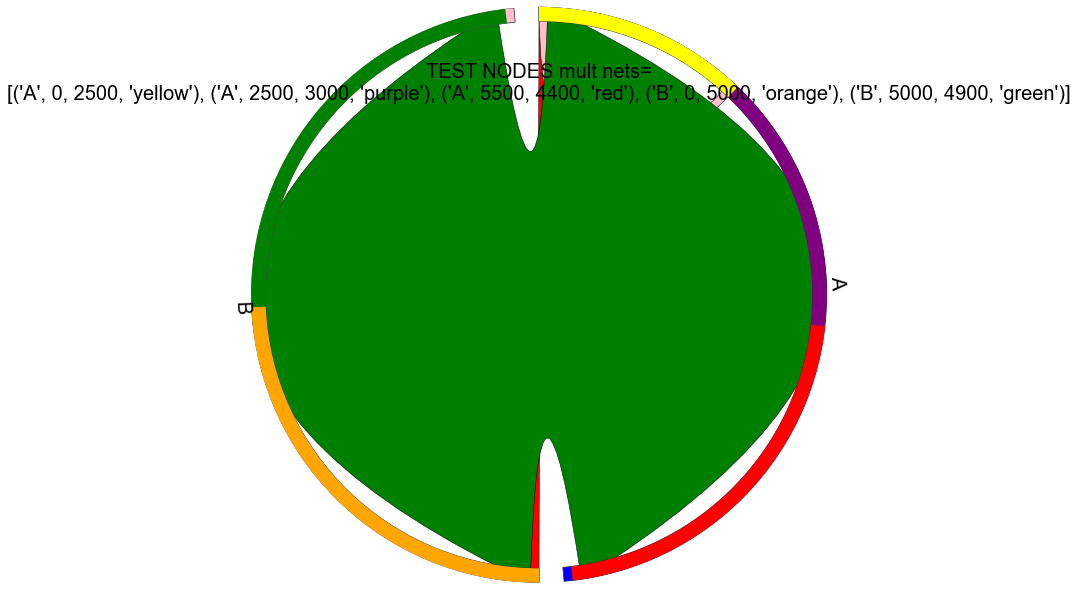

In [157]:
def test_nodes_MULT(mult):
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    parts = [(p,l*mult,c) for p,l,c in part_rows]
    nets=[(p,c*mult,w*mult,n) for p,c,w,n in net_rows5]
    nodes=[((s[0],s[1]*mult,s[2]*mult,s[3]),(d[0],d[1]*mult,d[2]*mult,d[3]),n) for s,d,n in nodes1]

    print("Parts",parts)
    print("Nets",nets)
    print("Nodes",nodes)
    c = PlotParts(parts) 
    PlotNetworksColor(nets,c)

    c.figure.suptitle("\n\nTEST NODES mult nets=\n"+str(nets), fontsize=20)

    # plot one node
    # for p,s,sw,d,dw,n,net in rows:
    for n in nodes:
        src, dest, color = n
        # c.chord_plot(src, dest, facecolor=color,linewidth=10) # linewidth is OUTLINE
        c.chord_plot(src, dest, facecolor=color,linewidth=0.5) # THICK

test_nodes_MULT(100)

Parts [('A', 100, 'blue'), ('B', 100, 'pink'), ('E', 100, 'purple'), ('C', 100, 'deepskyblue'), ('D', 100, 'lightsalmon'), ('F', 100, 'hotpink'), ('G', 100, 'limegreen')]
Nets [('A', 0, 25, 'yellow'), ('A', 25, 30, 'purple'), ('A', 55, 44, 'red'), ('B', 0, 50, 'orange'), ('B', 50, 49, 'green'), ('E', 0, 25, 'thistle')]
Nodes [(('A', 0, 1, 1000), ('B', 0, 1, 1000), 'red'), (('A', 0, 1, 1000), ('A', 24, 25, 1000), 'pink'), (('A', 98, 1, 1000), ('B', 98, 1, 1000), 'green'), (('A', 0, 1, 1000), ('E', 0, 1, 1000), 'thistle')]
Parts [('A', 100, 'blue'), ('B', 100, 'pink'), ('E', 100, 'purple')]
Nets [('A', 0, 25, 'yellow'), ('A', 25, 30, 'purple'), ('A', 55, 44, 'red'), ('B', 0, 50, 'orange'), ('B', 50, 49, 'green'), ('E', 0, 25, 'thistle')]
Nodes [(('A', 0, 1, 1000), ('B', 0, 1, 1000), 'red'), (('A', 0, 1, 1000), ('A', 24, 25, 1000), 'pink'), (('A', 98, 1, 1000), ('B', 98, 1, 1000), 'green'), (('A', 0, 1, 1000), ('E', 0, 1, 1000), 'thistle')]


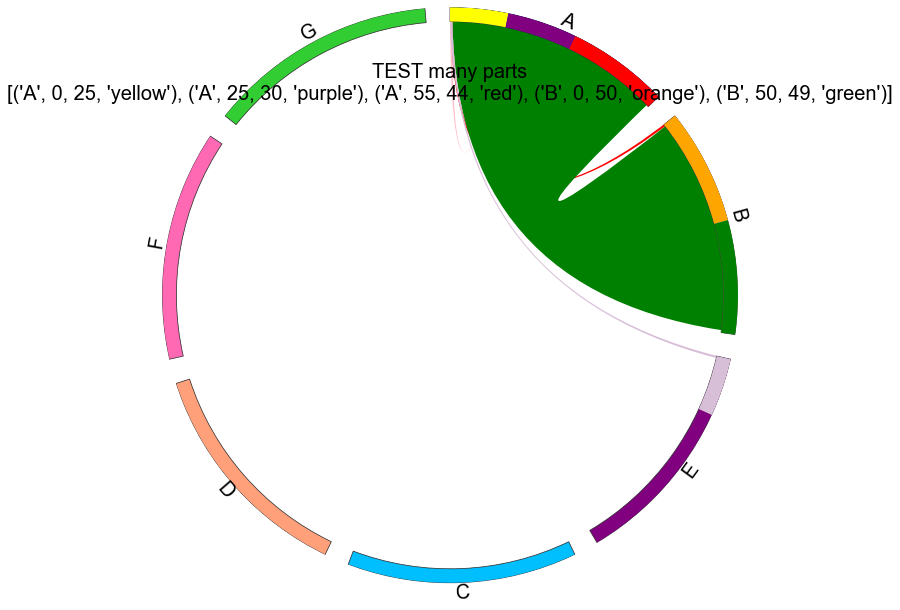

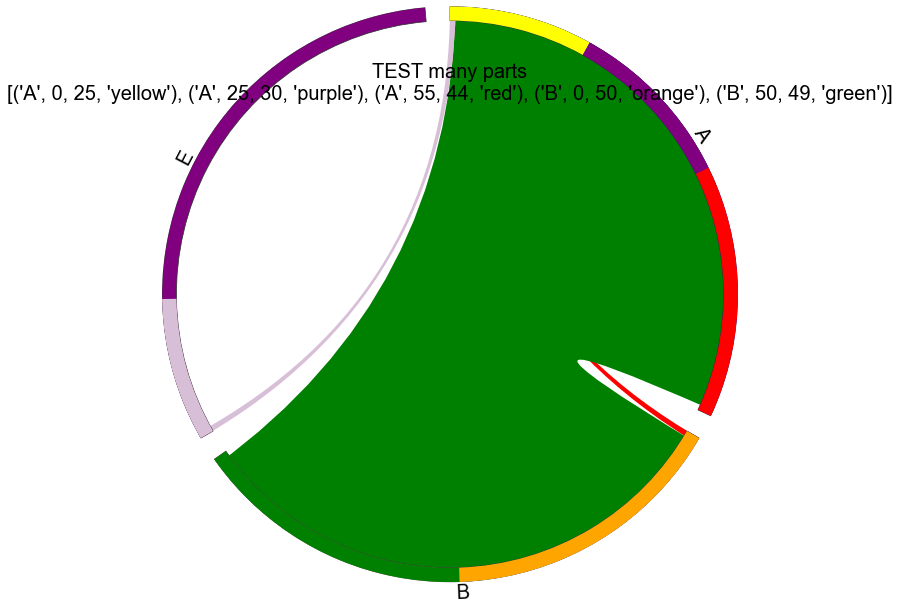

In [158]:
# test that alot of partiions will make line thinner
def test_nodes_many_parts(add):
    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)

    parts = part_rows + [
        ('E', 100, 'purple'),
    ]
    if add:
        parts = parts + [
        ('C', 100, 'deepskyblue'),
        ('D', 100, 'lightsalmon'),
        ('F', 100, 'hotpink'),
        ('G', 100, 'limegreen'),
        ]
    nets = net_rows5 + [
        ('E', 0, 25, 'thistle')
    ]
    nodes = nodes1 + [
       ( ('A', 0, 1, 1000), ('E', 0, 1, 1000), 'thistle') ,
    ]
    print("Parts",parts)
    print("Nets",nets)
    print("Nodes",nodes)
    c = PlotParts(parts) 
    PlotNetworksColor(nets,c)

    c.figure.suptitle("\n\nTEST many parts\n"+str(net_rows5), fontsize=20)

    # plot one node
    # for p,s,sw,d,dw,n,net in rows:
    for n in nodes:
        src, dest, color = n
        c.chord_plot(src, dest, facecolor=color)
test_nodes_many_parts(add=True)
test_nodes_many_parts(add=False)

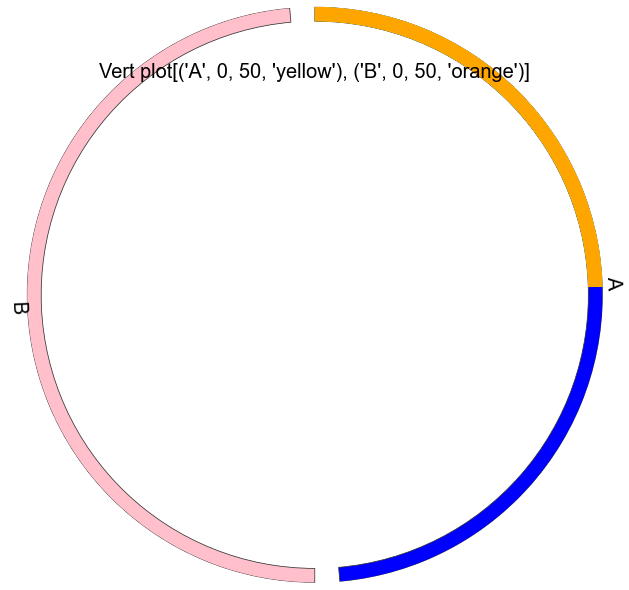

In [159]:
# TEST THAT PLOTTING VERTICALLY makes no difference
def test6():
    starts = vert(net_rows,1)
    lens = vert(net_rows,2)
    colr = vert(net_rows,3)

    # c1 = PlotParts(part_rows)
    # c1.figure.suptitle("\n\n"+str(part_rows), fontsize=20)
    c = PlotParts(part_rows) 
    PlotNetworksVERT('A',starts, lens, colr, c )

    c.figure.suptitle("\n\nVert plot"+str(net_rows), fontsize=20)
test6()

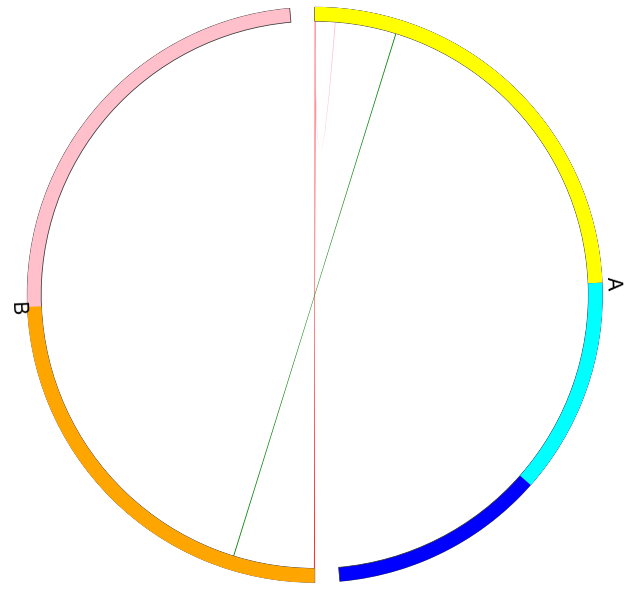

In [160]:
def test_big_parts():
    '''  lines ARE  thinner if more partitions'''
    # test edges - sometimes network colors extend past partition

    part_rows = [ ('A',1000, 'blue'),
                  ('B',1000, 'pink')]

    net_rows  = [ ('A',0, 500, 'yellow'), 
                  ('A',500,250,'aqua'),
                  ('B',0, 500, 'orange')]
                  
    nodes = [    (('A', 0,1, 1000), ('B',0,1, 1000), 'red'),
                 (('A', 0,1, 1000), ('A',24,25, 1000), 'pink'), # A25 - ONE LESS
                 (('A', 98,99, 1000), ('B',98,99, 1000), 'green'), # A25 - ONE LESS
     ]

    c = PlotParts(part_rows) 
    PlotNetworksColor(net_rows,c)

    for n in nodes:
        src, dest, color = n
        c.chord_plot(src, dest, facecolor=color)

test_big_parts()